# Pelota que cae
Se trata de hacer una simulaión del movimiento de una pelota que cae, bajo la acción de la gravedad, ademas de tener fricción con el medio donde cae y dando la posiblidad de que el medio donde cae se mueva con una cierta velocidad.
La solución nos la da las ecuaciones de Newton, que  son:

$$m \frac{d^2\vec r }{dt^2} = -g \hat k + \vec f_{fricc}+ \vec f_{ext}$$

Fís. José Manuel Villarreal Huerta

In [85]:
from pylab import*
from scipy.integrate import*
%matplotlib inline

Lo primero que hacemos es importar las librerias pylab, scipy.integrate, matplotlib, que nos ayudaran con la integración de la segunda ley de Newton.

In [86]:
 def fuerza (v_r,t,gama=0,viento=[0,0],m=1,g=9.8):
    #v_r=[ry,rz,vy,vz]
    dvz = -g/m-(gama/m)*v_r[3]+viento[1]
    dvy = -(gama/m)*v_r[2]+viento[0]
    drz = v_r[3]
    dry =v_r[2]
    return [dry,drz,dvy,dvz]

Para poder integrar la ecuación, primero definimos una funcion que expresa la relación entre las diferentes variables involucradas, asumimos que entre la fuerza de fricción y la velocidad del objeto existe una relación directamente proporcional y que el coeficiente de fricción es gama, ademas que existe una fuerza constante debida al viento, de manera que la función fuerza queda definida, terminos de su posisición inicial y su velocidad inicial, de la gama de la fuerza del viento, de la aceleración de la gravedad y del tiempo.

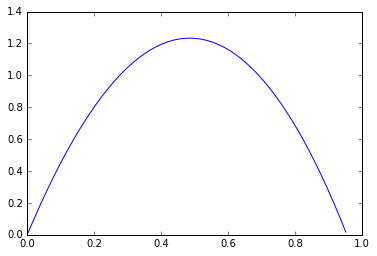

In [87]:
tiempo = linspace(0,1)
resultado = odeint(fuerza,[0,0,1,5],tiempo,args=(0.1,))
y,z,vy,vz = resultado[:,0],resultado[:,1],resultado[:,2],resultado[:,3]
plot(y,z)
show ()

En este primer ejemplo integramos la ecuación diferencial con las siguientes condiciones el punto de partida es el origen con una velocidad de 1 en el eje y, y de 5 en el eje z,la masa es de 1 y el coeficiente de fricción tiene un valor de 0.1

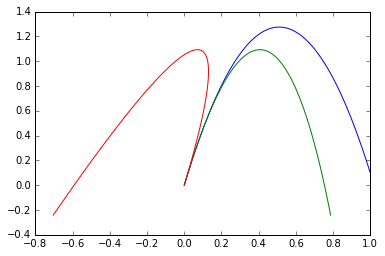

In [88]:
tiempo = linspace(0,1)
s_ideal= odeint(fuerza,[0,0,1,5],tiempo)
y_id,z_id = s_ideal[:,0],s_ideal[:,1]
s_fric = odeint(fuerza,[0,0,1,5],tiempo,args=(0.5,))
y_f,z_f= s_fric[:,0],s_fric[:,1]
s_f_v= odeint(fuerza,[0,0,1,5],tiempo,args=(0.5,[-3.5,0],))
y_f_v,z_f_v= s_f_v[:,0],s_f_v[:,1]
plot(y_id,z_id,y_f,z_f,y_f_v,z_f_v)
xlim
show ()

En este segundo ejemplo integramos la ecuación diferencial para tres grupos de condiciones iniciales, en la primera de color azul tenemos que la pelota se lanza desde el origen, con una velocidad inicila de 1 en el eje y y de 5 en el eje z, no existe fricción con el aire y ademas no hay viento, para el segundo grupo de condiciones se toma el mismo punto de origen la misma velocidad inicial que en anterior pero en esta simulación la fricción con el aire si exite teniendo un coeficiente igual a 0.5. PPor último tenemos una condición exactamente igual a la anterior con la diferencia de que el viento ejerce una fuerza de -3,5 en el eje y, esta última se grafica de color rojo.

In [89]:
lista= [1,2,3,523,154,1646,13,354]
print lista
print lista[1:4]

[1, 2, 3, 523, 154, 1646, 13, 354]
[2, 3, 523]


En lo que sigue resolveremos el problema más apegado a la realidad en donde la pelota golpea el suelo y rebota, para esto comenzamos aprendiendo a imprimir una lista, lo cual podemos hacer imprimiendo el total de la lista o tan solo algunos elementos de la lista.

In [90]:
def funcion1(x,y,otra_funcion):
    salida = otra_funcion(x)+y
    return salida
def funcion2(x):
    salida = x**2
    return salida
def funcion3(x):
    salida= x**3
    return salida

también aprendimos a definir una función en términos de otra función como es el caso de la función, funcion1 definida anteriormente en términos del valor que toma otra función, funcion3 en el caso que se presenta a continuación.

In [91]:
print funcion2(4.)
print funcion3(4.)
print funcion1(5.,8,funcion3)

16.0
64.0
133.0


In [92]:
def pedazo_trayectoria(pto_ini,dt=0.1,param=[0,[0,0],1,9.8]):
    tiempo= array([0,dt])
    sol = odeint(fuerza,pto_ini,tiempo,args=(param[0],param[1],param[2],param[3],))
    return sol

Para poder resolver el problema del rebote necesitamos saber la coordenada y para la cual alcanza el punto z igual a cero, para resolver este problema definimos una nueva función llamada pedazo de trayectoria que nos da la solución para un pequeño tiempo de recorrido de la pelota, en el caso anterior ese tiempo es de 0.1.

In [93]:
pedazo_trayectoria([0,0,1,1])

array([[ 0.   ,  0.   ,  1.   ,  1.   ],
       [ 0.1  ,  0.051,  1.   ,  0.02 ]])

Como ejemplo obtenemos la solución para cuando la pelota arranca del origen y se lanza con una velocidad inicial de 1 en y y 1 en z, los demas parmetros se dan por default, no hay fricción no hay viento la masa es de uno y la aceleración de la gravedad es de 9.8, como resultado tenemos un arreglo donde el primer vector son las condiciones iniciales y el segundo vector es la solución para cuando el tiempo de 0.1 ha trascurrido

In [94]:
sol =odeint(fuerza,[0,0,1,1],[0,0.1])
print sol, sol[:,1][0],sol[:,1][1]

[[ 0.     0.     1.     1.   ]
 [ 0.1    0.051  1.     0.02 ]] 0.0 0.0509999988224


In [95]:
def rebote(punto,dt,param):
    error= 1e-5
    dt=dt/2
    sol =odeint(fuerza,punto,[0,dt],args=(param[0],param[1],param[2],param[3],))
    while abs(sol[:,1][0]-sol[:,1][1])> error:
        if sol[:,1][0]*sol[:,1][1]<0:
            punto=sol[0]
        else:
            punto=sol[1]
        dt=dt/2
        sol =odeint(fuerza,punto,[0,dt],args=(param[0],param[1],param[2],param[3],))
        #print sol[0]        
    return [sol[0][0],sol[0][1],sol[0][2],-sol[0][3]]

Para encontrar el punto donde la cordenada z es muy proxima a cero hacemos una iterción de tal manera que mientras  el valor absoluto de la posición inicial en z menos la posición final en esa misma cordenada sea mayor que un número muy pequeño llamado error y con un valor de 10 a la menos 5 para nuestro caso,el programa compruebe si el producto de esta diferencia es negativo en cuyo caso ya se paso del origen y por lo tanto el punto solución es la cordenada inicial, de lo contrario quiere decir que no ha llegado y el proceso se repite tomando la cordenada final como la inicial. 

In [96]:
def trayectoria (pto_ini,t_fin,param=[0,[0,0],1,9.8]):
    t_total,dt=[0],0.01
    t_actual=0
    y=[pto_ini[0]]
    z=[pto_ini[1]]
    while t_actual <= t_fin:
        t_actual = t_actual + dt
        sol =odeint(fuerza,pto_ini,[0,dt],args=(param[0],param[1],param[2],param[3],))
        if sol[:,1][0]*sol[:,1][1]<0:
            sol=rebote(sol[0],dt,param)
            y.append(sol[0])
            z.append(sol[1])
            pto_ini=sol
        else:
            y.append(sol[:,0][1])
            z.append(sol[:,1][1]) 
            pto_ini=sol[1]
    return y,z

Por último definimos una función llamada tayectoria que depende de un punto inicial de el tiempo en que queremos observar los rebotes llamado t_fin, y de los parametros antes descritos que son: gama, velocidad del viento masa de la pelota y aceleración de la gravedad, esta funcion hace repite el siguiente proceso mientras el valor del tiempo no exceda el t_fin, incrementa el tiempo en un valor de 0.1 en cada iteración, encuentra la solución para el tiempo que se lleva, comprueba si el producto de las cordenadas iniciales y finales en z es negativo, si es así entonces llama a la función rebote antes definida con el vector solución cero como punto de partida el intervalo de tiempo y los parámetros establecidos,con el resultado de rebote se agrega el valor del vector, sol cero, a la lista y y el valor del vector sol uno a la lista z, si la condición anterior no se cumple entonces se se agrega el valor de la cordenada y final a la lista y el valor de la cordenada z final a la lista z y se hace igual el valor del punto sol uno o silución en el tiempo final igual al punto inicial, la función entonces regresa las listas y y z

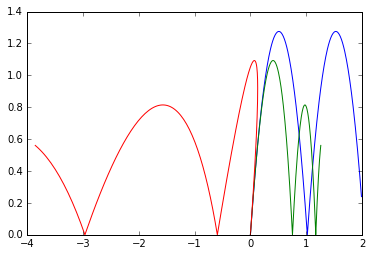

In [97]:
y_id,z_id= trayectoria([0,0,1,5],2)
y_f,z_f= trayectoria([0,0,1,5],2,[0.5,[0,0],1,9.8])
y_v,z_v= trayectoria([0,0,1,5],2,[0.5,[-3.5,0],1,9.8])
plot(y_id,z_id,y_f,z_f,y_v,z_v) 
show()

por último graficamos las trayectorias para diferentes grupos de parametros, la ideal en donde no hay fricción ni viento, en color azul, la segunda en donde existe fricción con un coeficiente gama de 0.5 en color verde y por último otra más en donde exite la misma fricción y ademas la velocida del viento es de menos 3.5 3n y y cero en z todas con el origen como punto de partida y con una velocidad inicial de 1 en y y 5 en z como siempre para una masa de 1 y aceleración dela gravedad de 9.8

In [82]:
rebote([ 0.6,0.036,1.,-2.88],0.05,[0,[0,0],1,9.8])

[ 0.6    0.036  1.    -2.88 ]
[ 0.6    0.036  1.    -2.88 ]
[ 0.60625     0.01780859  1.         -2.94125   ]
[ 0.609375    0.00856934  1.         -2.971875  ]
[ 0.6109375   0.00391382  1.         -2.9871875 ]
[  6.11718750e-01   1.57708739e-03   1.00000000e+00  -2.99484375e+00]
[  6.12109375e-01   4.06478874e-04   1.00000000e+00  -2.99867188e+00]
[  6.12109375e-01   4.06478874e-04   1.00000000e+00  -2.99867188e+00]
[  6.12207031e-01   1.13593094e-04   1.00000000e+00  -2.99962891e+00]
[  6.12207031e-01   1.13593094e-04   1.00000000e+00  -2.99962891e+00]
[  6.12231445e-01   4.03570457e-05   1.00000000e+00  -2.99986816e+00]
[  6.12243652e-01   3.73683110e-06   1.00000000e+00  -2.99998779e+00]
[  6.12243652e-01   3.73683110e-06   1.00000000e+00  -2.99998779e+00]


([0.61224365234374989, 3.7368311003308554e-06, 1.0, 2.9999877929687497],)